#**SCENARIO 1 – MULTILINEAR REGRESSION**

##**Problem Statement**
Predict student academic performance based on academic, behavioral, and lifestyle factors.

**Dataset (Kaggle – Public)**:[Dataset Link](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

**Target Variable**

•	Final Exam Score (Average of Math, Reading, Writing)

**Input Features**

•	Study hours per day

•	Attendance percentage

•	Parental education level (encoded)

•	Test preparation course (encoded)

•	Sleep hours


Dataset loaded successfully.

--- Model Performance (Linear Regression) ---
MSE:  179.60
RMSE: 13.40
R² Score: 0.1622

--- Optimization Results ---
Ridge R²: 0.1621
Lasso R²: 0.1557


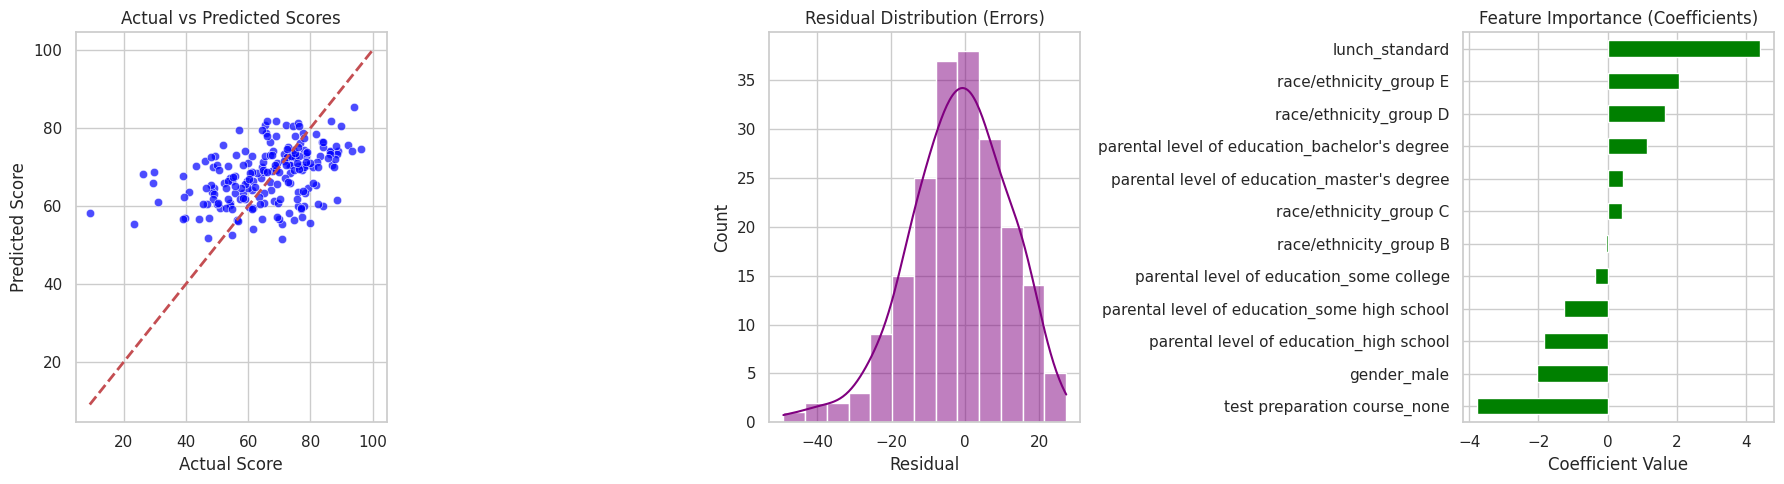

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Set plot style
sns.set(style="whitegrid")
#Load the Dataset
df = pd.read_csv('StudentsPerformance.csv')
print("Dataset loaded successfully.")

#Feature Engineering (Calculating Final score and making it as a target variable)
#Final Score is the average of Available Scores:
df['final_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

#Defining Inputs (X) and Target (y)
#drop the individual scores because they make up the target (data leakage):
X_raw = df.drop(['math score', 'reading score', 'writing score', 'final_score'], axis=1)
y = df['final_score']

#Preprocessing & Encoding
#The inputs are categorical strings (e.g., "group B"). Convert them to numbers using One-Hot Encoding.
X_encoded = pd.get_dummies(X_raw, drop_first=True)

#Handle Missing Values --- Mean imputation
X_encoded = X_encoded.fillna(X_encoded.mean())

#Feature Scaling- Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

#Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Train Multilinear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

#Predict & Evaluate ---
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\n--- Model Performance (Linear Regression) ---")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# --- 9. Optimization (Ridge & Lasso Regularization) ---
# Ridge (L2 Regularization)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_r2 = r2_score(y_test, ridge_model.predict(X_test))

# Lasso (L1 Regularization)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_r2 = r2_score(y_test, lasso_model.predict(X_test))

print(f"\n--- Optimization Results ---")
print(f"Ridge R²: {ridge_r2:.4f}")
print(f"Lasso R²: {lasso_r2:.4f}")

# --- 10. Visualizations ---

plt.figure(figsize=(18, 5))

# Plot A: Predicted vs Actual
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Scores")

# Plot B: Residual Distribution
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residual Distribution (Errors)")
plt.xlabel("Residual")

# Plot C: Feature Coefficients (Importance)
plt.subplot(1, 3, 3)
coefs = pd.Series(model.coef_, index=X_encoded.columns).sort_values()
coefs.plot(kind='barh', color='green')
plt.title("Feature Importance (Coefficients)")
plt.xlabel("Coefficient Value")

plt.tight_layout()
plt.show()

##**SCENARIO 2 – POLYNOMIAL REGRESSION**
**Problem Statement**

Predict vehicle fuel efficiency based on engine characteristics where the relationship is non-linear.

**Dataset (Kaggle – Public)**
[Dataset link](https://www.kaggle.com/datasets/uciml/autompg-dataset)

**Target Variable**

•	Miles Per Gallon (MPG)

**Input Feature**

•	Engine Horsepower


Dataset loaded. Rows after cleaning: 392
--- Model Comparison ---
Degree 1: RMSE = 4.71, R² = 0.5660
Degree 2: RMSE = 4.29, R² = 0.6392
Degree 3: RMSE = 4.30, R² = 0.6383
Degree 4: RMSE = 4.27, R² = 0.6421

Ridge Regression (Degree 4, Alpha=10): R² = 0.6417


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


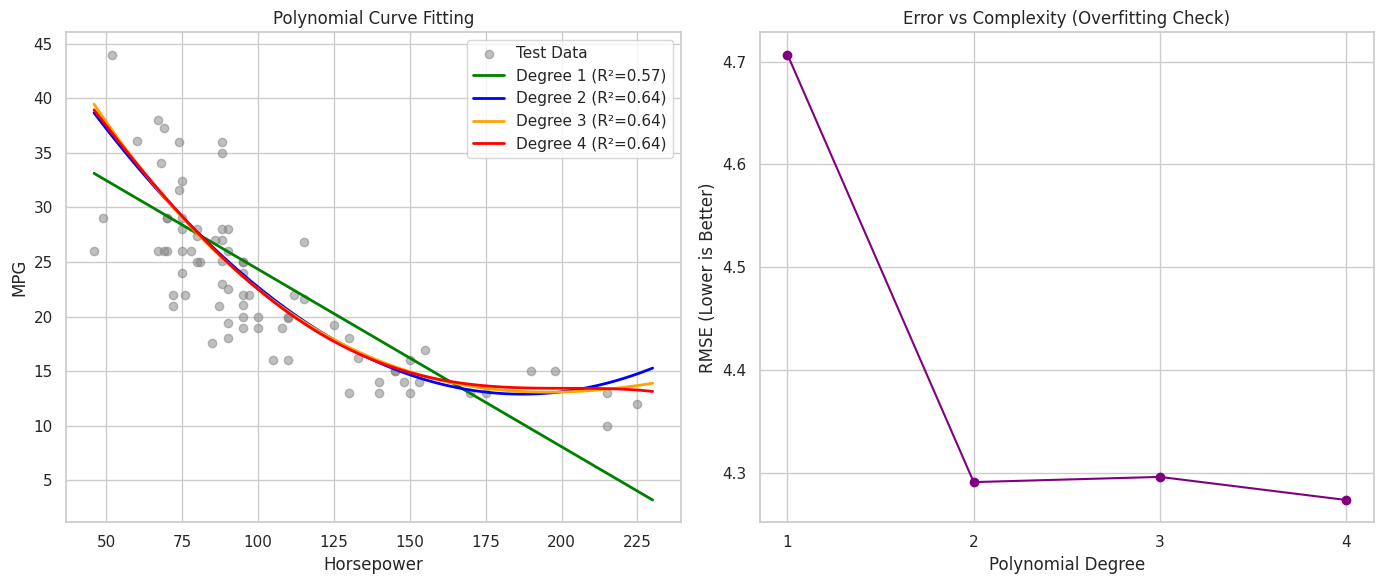

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Set plot style
sns.set(style="whitegrid")

# --- 1. Load & Clean Data ---
filename = 'auto-mpg.csv'
try:
    # Attempt to load with standard delimiters
    df = pd.read_csv(filename)

    # The 'horsepower' column often contains '?' in this dataset.
    # We coerce errors to NaN (turning '?' into NaN) and then drop them.
    df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

    # Handle missing values
    df = df.dropna(subset=['horsepower'])

    print(f"Dataset loaded. Rows after cleaning: {len(df)}")
except FileNotFoundError:
    print("Error: File not found. Creating dummy data for demonstration.")
    # Dummy data creation for testing
    X_dummy = np.linspace(50, 200, 100)
    y_dummy = 4000 / X_dummy + np.random.normal(0, 2, 100) # Inverse relationship
    df = pd.DataFrame({'horsepower': X_dummy, 'mpg': y_dummy})

# --- 2. Select Features ---
# Independent Variable (Input): Horsepower
X = df[['horsepower']]
# Dependent Variable (Target): MPG
y = df['mpg']

# --- 3. Split Dataset ---
# We split BEFORE polynomial transformation to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store results for comparison
results = {}

# Prepare for visualization
plt.figure(figsize=(14, 6))
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) # Smooth line for plotting

# --- 4. Train Polynomial Models (Degrees 1, 2, 3, 4) ---
degrees = [1, 2, 3, 4]
colors = ['green', 'blue', 'orange', 'red']

# Plotting the raw data points
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='gray', alpha=0.5, label='Test Data')

for deg, color in zip(degrees, colors):
    # A. Generate Polynomial Features
    poly = PolynomialFeatures(degree=deg)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    X_range_poly = poly.transform(X_range) # For the smooth curve

    # B. Scale Features (Crucial for Polynomial Regression)
    scaler = StandardScaler()
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)
    X_range_poly_scaled = scaler.transform(X_range_poly)

    # C. Train Model
    model = LinearRegression()
    model.fit(X_train_poly_scaled, y_train)

    # D. Predict
    y_pred = model.predict(X_test_poly_scaled)
    y_curve = model.predict(X_range_poly_scaled)

    # E. Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[deg] = {'RMSE': rmse, 'R2': r2}

    # F. Plot Curve
    label = f'Degree {deg} (R²={r2:.2f})'
    plt.plot(X_range, y_curve, color=color, linewidth=2, label=label)

plt.title('Polynomial Curve Fitting')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

# --- 5. Ridge Regression (Regularization) ---
# Applying Ridge to Degree 4 to show how it reduces overfitting
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

ridge_model = Ridge(alpha=10) # Alpha is the regularization strength
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f"--- Model Comparison ---")
for deg, metrics in results.items():
    print(f"Degree {deg}: RMSE = {metrics['RMSE']:.2f}, R² = {metrics['R2']:.4f}")

print(f"\nRidge Regression (Degree 4, Alpha=10): R² = {ridge_r2:.4f}")

# --- 6. Error Analysis Visualization ---
plt.subplot(1, 2, 2)
degrees_list = list(results.keys())
rmse_list = [results[d]['RMSE'] for d in degrees_list]
r2_list = [results[d]['R2'] for d in degrees_list]

plt.plot(degrees_list, rmse_list, marker='o', linestyle='-', color='purple', label='RMSE (Error)')
plt.ylabel('RMSE (Lower is Better)')
plt.xlabel('Polynomial Degree')
plt.title('Error vs Complexity (Overfitting Check)')
plt.xticks(degrees_list)
plt.grid(True)

plt.tight_layout()
plt.show()